In [ ]:
!pip install shap 
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 11.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, silhouette_score, matthews_corrcoef, mean_squared_error, precision_recall_curve
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold, cross_val_score
from yellowbrick.classifier import ROCAUC, ConfusionMatrix
from yellowbrick.model_selection import LearningCurve
import shap

In [ ]:
df = pd.read_csv('customer.csv')
df

,user_id,interval_2_1,interval_3_2,interval_4_3,interval_3_1,interval_4_1,interval_4_2,sub_interval,first_spend,third_spend,first+second_spend,second+third_spend,first+second+third_spend,label,label2
0,86499,2.911871,9999.000000,9999.0,9999.000000,9999.0,9999.0,23,2.00,0.00,16.00,14.00,16.00,no_loyal,no_loyal
1,86500,0.842518,17.032144,9999.0,17.874661,9999.0,9999.0,23,2.00,14.00,16.00,28.00,30.00,no_loyal,no_loyal
2,86501,2.952185,9999.000000,9999.0,9999.000000,9999.0,9999.0,23,2.00,0.00,16.00,14.00,16.00,no_loyal,no_loyal
3,86502,0.706260,9999.000000,9999.0,9999.000000,9999.0,9999.0,23,2.00,0.00,16.00,14.00,16.00,no_loyal,no_loyal
4,86503,1.223789,9999.000000,9999.0,9999.000000,9999.0,9999.0,23,2.00,0.00,16.00,14.00,16.00,no_loyal,no_loyal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44083,133830,9999.000000,9999.000000,9999.0,9999.000000,9999.0,9999.0,23,256.26,0.00,256.26,0.00,256.26,no_loyal,no_loyal
44084,133834,9999.000000,9999.000000,9999.0,9999.000000,9999.0,9999.0,23,34.24,0.00,34.24,0.00,34.24,no_loyal,no_loyal
44085,133836,0.098785,14.097189,9999.0,14.195974,9999.0,9999.0,23,14.98,17.66,36.92,39.60,54.58,no_loyal,no_loyal
44086,133837,14.077242,9999.000000,9999.0,9999.000000,9999.0,9999.0,23,14.98,0.00,32.64,17.66,32.64,no_loyal,no_loyal


In [ ]:
df['label'].value_counts()

no_loyal      36493
fund_infor     3486
infor          3478
fund            631
Name: label, dtype: int64

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


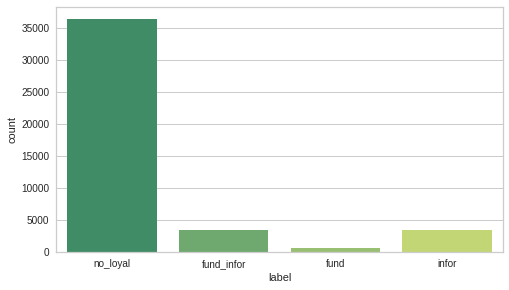

In [ ]:
plt.figure(figsize=(8,4.5))
sns.countplot(df['label'], palette='summer')
plt.show()

In [ ]:
X = df.drop(columns=['label','user_id','label2'])
X

,interval_2_1,interval_3_2,interval_4_3,interval_3_1,interval_4_1,interval_4_2,sub_interval,first_spend,third_spend,first+second_spend,second+third_spend,first+second+third_spend
0,2.911871,9999.000000,9999.0,9999.000000,9999.0,9999.0,23,2.00,0.00,16.00,14.00,16.00
1,0.842518,17.032144,9999.0,17.874661,9999.0,9999.0,23,2.00,14.00,16.00,28.00,30.00
2,2.952185,9999.000000,9999.0,9999.000000,9999.0,9999.0,23,2.00,0.00,16.00,14.00,16.00
3,0.706260,9999.000000,9999.0,9999.000000,9999.0,9999.0,23,2.00,0.00,16.00,14.00,16.00
4,1.223789,9999.000000,9999.0,9999.000000,9999.0,9999.0,23,2.00,0.00,16.00,14.00,16.00
...,...,...,...,...,...,...,...,...,...,...,...,...
44083,9999.000000,9999.000000,9999.0,9999.000000,9999.0,9999.0,23,256.26,0.00,256.26,0.00,256.26
44084,9999.000000,9999.000000,9999.0,9999.000000,9999.0,9999.0,23,34.24,0.00,34.24,0.00,34.24
44085,0.098785,14.097189,9999.0,14.195974,9999.0,9999.0,23,14.98,17.66,36.92,39.60,54.58
44086,14.077242,9999.000000,9999.0,9999.000000,9999.0,9999.0,23,14.98,0.00,32.64,17.66,32.64


In [ ]:
y = df['label']
y

0        no_loyal
1        no_loyal
2        no_loyal
3        no_loyal
4        no_loyal
           ...   
44083    no_loyal
44084    no_loyal
44085    no_loyal
44086    no_loyal
44087    no_loyal
Name: label, Length: 44088, dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123, stratify=y)

In [ ]:
std = StandardScaler().fit(X_train)
X_train = pd.DataFrame(std.transform(X_train))
X_test = pd.DataFrame(std.transform(X_test))

In [ ]:
X_train.columns = ['interval_2_1', 'interval_3_2', 'interval_4_3', 'interval_3_1', 'interval_4_1', 'interval_4_2', 'sub_interval', 'first_spend', 'third_spend', 'first+second_spend', 'second+third_spend', 'first+second+third_spend']
X_test.columns = ['interval_2_1', 'interval_3_2', 'interval_4_3', 'interval_3_1', 'interval_4_1', 'interval_4_2', 'sub_interval', 'first_spend', 'third_spend', 'first+second_spend', 'second+third_spend', 'first+second+third_spend']

SVM

In [ ]:
sv = SVC(random_state=123)
sv.fit(X_train, y_train)
sv_pred = sv.predict(X_test)

sv_precision = precision_score(y_test, sv_pred, average='weighted')
print("The precision is ", sv_precision)
sv_recall = recall_score(y_test, sv_pred, average='weighted')
print("The recall is ", sv_recall)
con_mrix = confusion_matrix(y_test,sv_pred)
print("The confusion_matrix is ", con_mrix)
sv_f1 = f1_score(y_test, sv_pred, average='weighted')
print("The f1 is ", sv_f1)

The precision is  0.8042900385835594
The recall is  0.8447493762757995
The confusion_matrix is  [[  13   17    1   95]
 [   3  208    9  477]
 [   0   48   21  627]
 [   0   77   15 7207]]
The f1 is  0.7981857658794831


Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=123)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

rf_precision = precision_score(y_test, rf_pred, average='weighted')
print("The precision is ", rf_precision)
rf_recall = recall_score(y_test, rf_pred, average='weighted')
print("The recall is ", rf_recall)
con_mrix = confusion_matrix(y_test,rf_pred)
print("The confusion_matrix is ", con_mrix)
rf_f1 = f1_score(y_test, rf_pred, average='weighted')
print("The f1 is ", rf_f1)

The precision is  0.8201707832235637
The recall is  0.8497391698797914
The confusion_matrix is  [[  14   34    3   75]
 [  13  401   51  232]
 [   1   92  108  495]
 [  14  163  152 6970]]
The f1 is  0.8305873678240981


In [ ]:
def plot_LearningCurv(model):
  loglc = LearningCurve(model,  title='Learning Curve', scoring='accuracy')
  loglc.fit(X_train, y_train)
  loglc.finalize()

.:. RF classification


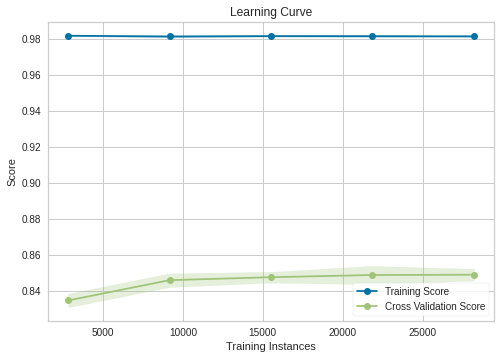

In [ ]:
print('.:. RF classification')
plot_LearningCurv(rf)
plt.savefig('learning_curve.pdf', bbox_inches='tight')

过拟合？

In [ ]:
importance = pd.DataFrame()
importance["features"] = list(X.columns)
importance["importance"] = list(rf.feature_importances_)
importance.sort_values(by="importance", ascending=False)

,features,importance
0,interval_2_1,0.137217
6,sub_interval,0.113135
10,second+third_spend,0.095039
11,first+second+third_spend,0.083215
8,third_spend,0.081841
7,first_spend,0.077068
2,interval_4_3,0.076186
9,first+second_spend,0.076139
4,interval_4_1,0.068547
3,interval_3_1,0.068321


Shap
特征排序-不区分特征值

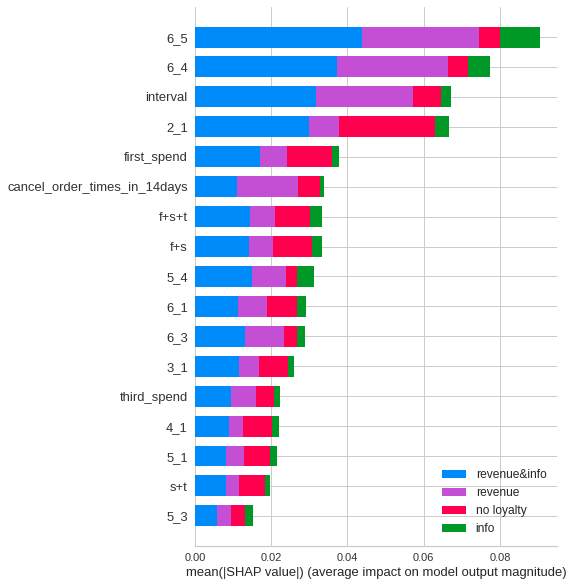

AttributeError: ignored

In [ ]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test,check_additivity=False)
shap.summary_plot(shap_values, X_test, plot_type="bar", class_names=['info', 'revenue', 'no loyalty', 'revenue&info'])

In [ ]:
def customer_analysis(model, customer):
  explainer = shap.TreeExplainer(model)
  shap_values = explainer.shap_values(customer)
  shap.initjs()
  return shap.force_plot(explainer.expected_value[1], shap_values[1], customer)

customers = X_test.iloc[1,:]
customers_target = y_test.iloc[1]
print('Target : ',customers_target)
customer_analysis(rf, customers)

Target :  no_loyal


In [ ]:
def customer_analysis(model, customer):
  explainer = shap.TreeExplainer(model)
  shap_values = explainer.shap_values(customer)
  shap.initjs()
  return shap.force_plot(explainer.expected_value[3], shap_values[3], customer)

customers = X_test.iloc[3,:]
customers_target = y_test.iloc[3]
print('Target : ',customers_target)
customer_analysis(rf, customers)

Target :  fund_infor


全局解释

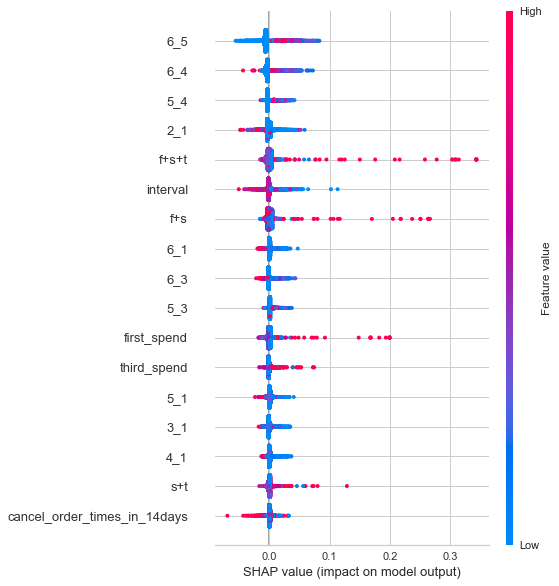

In [ ]:
# Shap value for Model Explaination
shap.summary_plot(shap_values[0], X_test)  

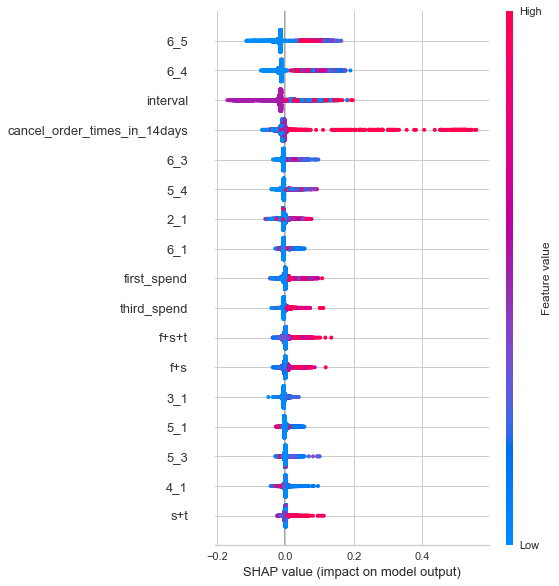

In [ ]:
shap.summary_plot(shap_values[1], X_test) # revenue

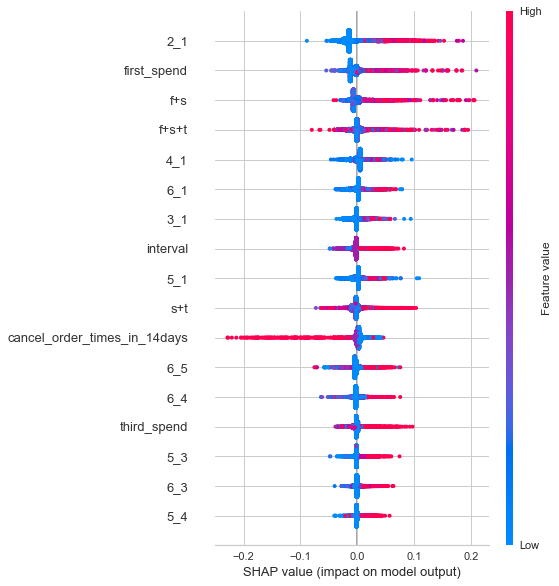

In [ ]:
shap.summary_plot(shap_values[2], X_test) # no loyalty

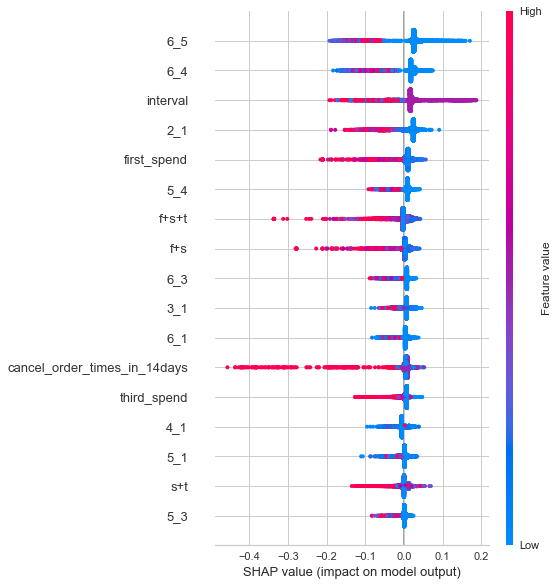

In [ ]:
shap.summary_plot(shap_values[3], X_test)  #revenue&info